## To mount the data to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data and Preliminary Analysis

In [ ]:
## Define data paths
train_path = '/content/drive/MyDrive/Image_set/train'
test_path = '/content/drive/MyDrive/Image_set/val'

### To find the count of training and test images in the source data

In [ ]:
import os

def count_training_and_testing_images(train_path, test_path):
    """
    Count the number of training and testing images in the given directories.

    Parameters:
        train_path (str): The directory path containing training images.
        test_path (str): The directory path containing testing images.

    Returns:
        int: The number of training images.
        int: The number of testing images.
    """
    # Function to load images and labels
    def load_data(data_dir):
        images = []
        labels = []
        class_dirs = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
        for class_dir in class_dirs:
            class_label = class_dir
            class_path = os.path.join(data_dir, class_dir)
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                images.append(image_path)
                labels.append(class_label)
        return images, labels

    # Load training and testing data
    train_img, train_lbl = load_data(train_path)
    test_img, test_lbl = load_data(test_path)

    # Get the number of training and testing images
    num_training_images = len(train_img)
    num_testing_images = len(test_img)

    return num_training_images, num_testing_images

# Example usage
train_path = '/content/drive/MyDrive/Image_set/train'
test_path = '/content/drive/MyDrive/Image_set/val'

num_train_images, num_test_images = count_training_and_testing_images(train_path, test_path)
print("Number of training images:", num_train_images)
print("Number of testing images:", num_test_images)


Number of training images: 9469
Number of testing images: 3925


### List the image files in train and test directories

In [ ]:
import os
import pandas as pd

def list_image_files(directory):
    """
    List full paths of all image files in the given directory.

    Parameters:
        directory (str): The directory path to search for image files.

    Returns:
        list: A list of full paths to image files found in the directory.

    Assumes common image file extensions such as .jpg, .jpeg, .png, .bmp, .gif.
    """
    img_ext = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
    return [os.path.join(root, file)
            for root, dirs, files in os.walk(directory)
            for file in files
            if os.path.splitext(file)[1].lower() in img_ext]

# List image files in the training and validation directories
train_img_files = list_image_files(train_path)
test_img_files = list_image_files(test_path)

# Create DataFrames
train_df = pd.DataFrame({'image_path': train_img_files})
test_df = pd.DataFrame({'image_path': test_img_files})

# Display the first few entries of the training DataFrame
print("Train DataFrame:")
print(train_df.head())

print("\nTest DataFrame:")
print(test_df.head())


Train DataFrame:
                                          image_path
0  /content/drive/MyDrive/Image_set/train/n038882...
1  /content/drive/MyDrive/Image_set/train/n038882...
2  /content/drive/MyDrive/Image_set/train/n038882...
3  /content/drive/MyDrive/Image_set/train/n038882...
4  /content/drive/MyDrive/Image_set/train/n038882...

Test DataFrame:
                                          image_path
0  /content/drive/MyDrive/Image_set/val/n03888257...
1  /content/drive/MyDrive/Image_set/val/n03888257...
2  /content/drive/MyDrive/Image_set/val/n03888257...
3  /content/drive/MyDrive/Image_set/val/n03888257...
4  /content/drive/MyDrive/Image_set/val/n03888257...


### Display an Image

Please find the image below:


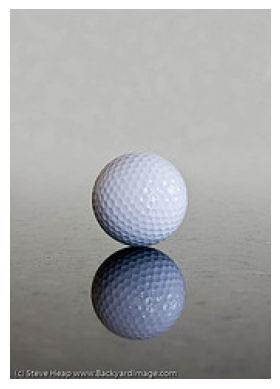

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Function to display an image
def disp_img(image_path):
    """
    Display an image given its file path.

    Parameters:
        image_path (str): The file path to the image.

    Returns:
        None
    """
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Display an image from the training set
print("Please find the image below:")
fir_img_path = train_df['image_path'][1500]
disp_img(fir_img_path)


### To display the shape of the image and path of the image

In [ ]:
from PIL import Image
import numpy as np

def disp_img_shape_and_path(image_path):
    """
    Load an image using PIL, convert it to a NumPy array, and display its shape and path.

    Parameters:
        image_path (str): The file path to the image.

    Returns:
        None
    """
    # Load the image using PIL
    image = Image.open(image_path)

    # Convert the PIL Image to a NumPy array
    image_array = np.array(image)

    # Print the shape of the image array
    print(f"Image shape: {image_array.shape}")

    # Print the path of the image
    print(f"Image path: {image_path}")

# Example usage
image_path = train_df['image_path'][1500]
disp_img_shape_and_path(image_path)




Image shape: (240, 169, 3)
Image path: /content/drive/MyDrive/Image_set/train/n03445777/n03445777_13067.JPEG


### Image classification for an image from ImageSet

In [ ]:
from PIL import Image
import os

def load_image_and_classify(image_path, folder_to_category):
    """
    Load an image using PIL, extract the label from the directory structure,
    and classify it based on a provided folder-to-category mapping.

    Parameters:
        image_path (str): The file path to the image.
        folder_to_category (dict): A dictionary mapping folder names to category labels.

    Returns:
        str: The classification label of the image.
    """
    # Load the image using PIL
    image = Image.open(image_path)

    # Extract label from the directory structure
    label = os.path.basename(os.path.dirname(image_path))

    # Assign classification based on label
    classification = folder_to_category.get(label, 'Unknown')

    return classification

# Define the folder-category mapping
folder_to_category = {
    'n01440764': 'Fishes',
    'n02102040': 'Dogs',
    'n02979186': 'Electronic audio devices',
    'n03000684': 'Chainsaw',
    'n03028079': 'Church',
    'n03394916': 'French horn',
    'n03417042': 'Garbage Truck',
    'n03425413': 'Gas pump',
    'n03445777': 'Golf ball',
    'n03888257': 'Parachute'
}

# Load the image path from DataFrame
image_path = train_df['image_path'][1500]

# Classify the image
classification = load_image_and_classify(image_path, folder_to_category)

# Print the classification
print("Classification:", classification)


Classification: Golf ball


## Paths used for the below 3 CNN Models

In [ ]:
train_dir = '/content/drive/MyDrive/Image_set/train'
test_dir = '/content/drive/MyDrive/Image_set/val'

# Custom CNN Model

In [ ]:
## Own Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

class CustomCNN:
    """Custom Convolutional Neural Network class."""
    def __init__(self, input_shape, num_classes):
        """
        Initializes the CustomCNN class.

        Parameters:
        - input_shape (tuple): Shape of the input images (height, width, channels).
        - num_classes (int): Number of output classes.
        """
        self.model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
            BatchNormalization(),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
            BatchNormalization(),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(128, (3, 3), activation='relu'),
            BatchNormalization(),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten(),
            Dense(512, activation='relu'),
            Dropout(0.1),
            Dense(num_classes, activation='softmax')
        ])

        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

    def train(self, train_data, val_data, epochs, train_datagen):
        """
        Trains the model.

        Parameters:
        - train_data (str): Path to the directory containing the training data.
        - val_data: Validation data.
        - epochs (int): Number of training epochs.
        - train_datagen: Data augmentation configuration.

        Returns:
        - history: Training history.
        """
        train_data_augmented = train_datagen.flow_from_directory(train_data, target_size=(128, 128),
                                                                 batch_size=32, class_mode='categorical')
        history = self.model.fit(train_data_augmented, epochs=epochs, validation_data=val_data)
        return history

    def evaluate(self, test_data):
        """
        Evaluates the model.

        Parameters:
        - test_data: Test data.
        """
        test_loss, test_accuracy = self.model.evaluate(test_data)
        print(f'Test Loss: {test_loss}')
        print(f'Test Accuracy: {test_accuracy * 100}%')

    def summary(self):
        """Prints a summary of the model."""
        self.model.summary()

# Data Augmentation Configuration
train_datagen = ImageDataGenerator(
    rescale=1./255,               # Rescale pixel values to the range [0,1]
    shear_range=0.2,              # Shear transformations (shear angle in radians)
    zoom_range=0.2,               # Randomly zoom into images
    rotation_range=20,            # Rotate images by up to 20 degrees
    width_shift_range=0.1,        # Shift width by up to 10%
    height_shift_range=0.1,       # Shift height by up to 10%
    brightness_range=[0.8, 1.2],  # Adjust brightness
    horizontal_flip=True          # Flips images horizontally
)

# Main block
if __name__ == "__main__":
    BATCH_SIZE = 32
    IMG_SIZE = (128, 128)
    num_classes = 10
    train_dir = '/content/drive/MyDrive/Image_set/train'
    test_dir = '/content/drive/MyDrive/Image_set/val'

    train_dataset = image_dataset_from_directory(
        train_dir,
        shuffle=True,
        batch_size=BATCH_SIZE,
        image_size=IMG_SIZE,
        label_mode='categorical'
    )

    test_dataset = image_dataset_from_directory(
        test_dir,
        batch_size=BATCH_SIZE,
        image_size=IMG_SIZE,
        label_mode='categorical'
    )

    cnn_model = CustomCNN((128, 128, 3), num_classes)
    cnn_model.summary()
    history = cnn_model.train(train_dir, test_dataset, epochs=10, train_datagen=train_datagen)
    cnn_model.evaluate(test_dataset)


Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_4 (Bat  (None, 61, 61, 64)        256       
 chNormalization)                   

### Custom CNN Model: Plots between epoch vs loss and accuracy

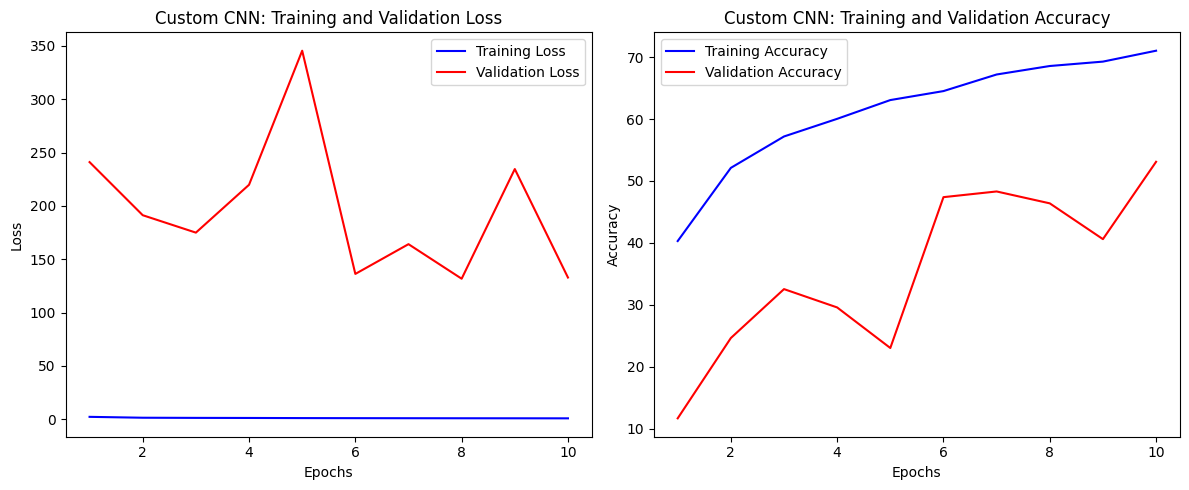

In [ ]:
# Plot epoch vs loss and accuracy for both training and validation data

import matplotlib.pyplot as plt

def plot_loss_accuracy(train_loss, train_accuracy, val_loss, val_accuracy):
    """
    Plot epoch vs loss and accuracy for both training and validation data.

    Parameters:
        train_loss (list): List of training loss values for each epoch.
        train_accuracy (list): List of training accuracy values for each epoch.
        val_loss (list): List of validation loss values for each epoch.
        val_accuracy (list): List of validation accuracy values for each epoch.
    """
    epochs = range(1, len(train_loss) + 1)

    # Plot training and validation loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Custom CNN: Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.title('Custom CNN: Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Provided data
train_loss = [2.3009, 1.4749, 1.3317, 1.2582, 1.1397, 1.0739, 1.0212, 0.9788, 0.9465, 0.9019]
train_accuracy = [40.30, 52.12, 57.19, 60.04, 63.07, 64.52, 67.20, 68.57, 69.28, 71.04]
val_loss = [241.0915, 191.3248, 174.9915, 219.8380, 345.5185, 136.2765, 164.1702, 131.7822, 234.5933, 132.9004]
val_accuracy = [11.67, 24.64, 32.54, 29.58, 23.03, 47.39, 48.31, 46.39, 40.61, 53.10]

# Plot loss and accuracy for both training and validation data
plot_loss_accuracy(train_loss, train_accuracy, val_loss, val_accuracy)


# Inception Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

class InceptionModel:
    """A class to build, train, and evaluate an InceptionV3 model."""

    def __init__(self, train_data_dir, test_data_dir, img_width=224, img_height=224, num_classes=10, epochs=3):
        """
        Initialize the InceptionModel object.

        Args:
            train_data_dir (str): Path to the directory containing training data.
            test_data_dir (str): Path to the directory containing test data.
            img_width (int): Width of the input images.
            img_height (int): Height of the input images.
            num_classes (int): Number of classes for classification.
            epochs (int): Number of epochs for training.
        """
        self.train_data_dir = train_data_dir
        self.test_data_dir = test_data_dir
        self.img_width = img_width
        self.img_height = img_height
        self.input_shape = (img_width, img_height, 3)
        self.num_classes = num_classes
        self.epochs = epochs
        self.val_gen = None  # Initialize validation generator as None

    def build_model(self):
        """Build the InceptionV3 model."""
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=self.input_shape)
        for layer in base_model.layers:
            layer.trainable = False

        self.model = Sequential([
            base_model,
            Flatten(),
            Dense(512, activation='relu'),
            Dropout(0.1),
            Dense(self.num_classes, activation='softmax')
        ])
        self.model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    def train_model(self):
        """Train the InceptionV3 model."""
        train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1. / 255,          # Rescale pixel values to the range [0,1]
            shear_range=0.2,           # Shear transformations (shear angle in radians)
            zoom_range=0.2,            # Zoom into images
            horizontal_flip=True)      # Flips images horizontally

        test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

        train_gen = train_datagen.flow_from_directory(
            self.train_data_dir,
            target_size=(self.img_width, self.img_height),
            batch_size=32,
            class_mode='categorical')

        self.val_gen = test_datagen.flow_from_directory(
            self.test_data_dir,
            target_size=(self.img_width, self.img_height),
            batch_size=32,
            class_mode='categorical')

        self.model.fit(
            train_gen,
            steps_per_epoch=train_gen.samples // train_gen.batch_size,
            epochs=self.epochs,
            validation_data=self.val_gen,
            validation_steps=self.val_gen.samples // self.val_gen.batch_size)

    def evaluate_model(self):
        """Evaluate the trained InceptionV3 model."""
        if self.val_gen:
            score = self.model.evaluate(self.val_gen, verbose=0)
            print('Test loss:', score[0])
            print('Test accuracy:', score[1])
        else:
            print("Validation generator not available.")

    def display_summary(self):
        """Display the model summary."""
        self.model.summary()

# Path
train_data_dir = '/content/drive/MyDrive/Image_set/train'
test_data_dir = '/content/drive/MyDrive/Image_set/val'

# Create an instance of the InceptionModel class
inception_model = InceptionModel(train_data_dir, test_data_dir)

# Build the model
inception_model.build_model()

# Display model summary
inception_model.display_summary()

# Train the model
inception_model.train_model()

# Evaluate the model
inception_model.evaluate_model()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 512)               26214912  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 48022826 (183.19 MB)
Trainable params: 26220042 (100.02 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________
Found 

### Inception CNN Model: Plots between epoch vs loss and accuracy

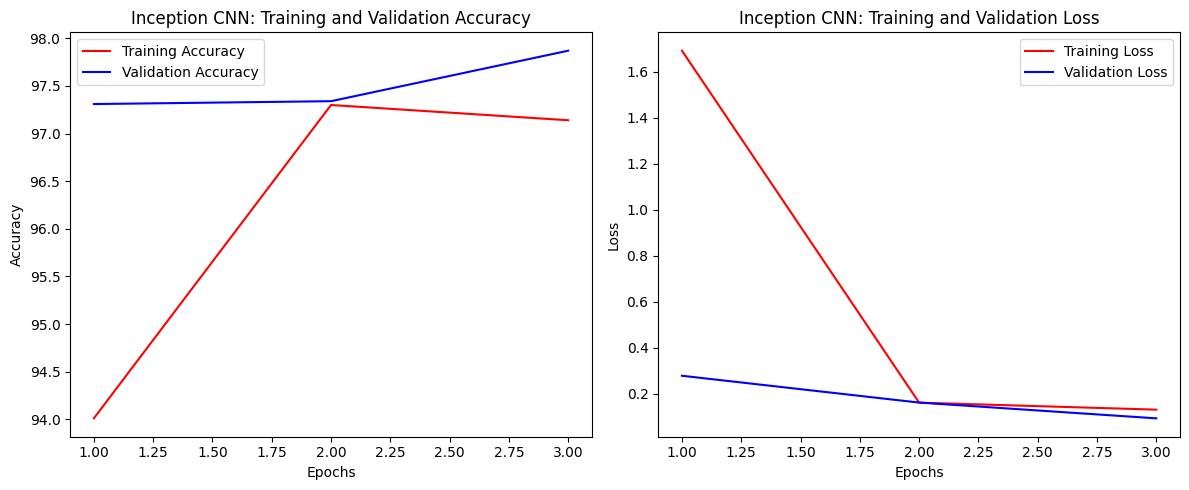

In [ ]:
import matplotlib.pyplot as plt

def plot_epochs_metrics(epochs, train_loss, train_accuracy, val_loss, val_accuracy):
    """
    Plot training and validation metrics over epochs.

    Args:
        epochs (list): List of epoch numbers.
        train_loss (list): List of training loss values.
        train_accuracy (list): List of training accuracy values.
        val_loss (list): List of validation loss values.
        val_accuracy (list): List of validation accuracy values.
    """
    # Plotting epoch vs accuracy and epoch vs loss side by side
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Plotting epoch vs accuracy
    axs[0].plot(epochs, train_accuracy, 'r', label='Training Accuracy')
    axs[0].plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
    axs[0].set_title('Inception CNN: Training and Validation Accuracy')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    # Plotting epoch vs loss
    axs[1].plot(epochs, train_loss, 'r', label='Training Loss')
    axs[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    axs[1].set_title('Inception CNN: Training and Validation Loss')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Loss')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

epochs = range(1, 4)
train_loss = [1.6913, 0.1611, 0.1306]
train_accuracy = [94.01, 97.30, 97.14]
val_loss = [0.2779, 0.1613, 0.0928]
val_accuracy = [97.31, 97.34, 97.87]

# Plotting
plot_epochs_metrics(epochs, train_loss, train_accuracy, val_loss, val_accuracy)


# DenseNet CNN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

class DenseNetModel:
    """A class to build, train, and evaluate a DenseNet121 model"""

    def __init__(self, train_data_dir, test_data_dir, img_width=224, img_height=224, num_classes=10, epochs=3):
        """
        Initialize the DenseNetModel object.

        Args:
            train_data_dir (str): Path to the directory containing training data.
            test_data_dir (str): Path to the directory containing test data.
            img_width (int): Width of the input images.
            img_height (int): Height of the input images.
            num_classes (int): Number of classes for classification.
            epochs (int): Number of epochs for training.
        """
        self.train_data_dir = train_data_dir
        self.test_data_dir = test_data_dir
        self.img_width = img_width
        self.img_height = img_height
        self.input_shape = (img_width, img_height, 3)
        self.num_classes = num_classes
        self.epochs = epochs

        # Data preprocessing and augmentation
        self.train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1. / 255,          # Rescale pixel values to the range [0,1]
            shear_range=0.2,           # Shear transformations (shear angle in radians)
            zoom_range=0.2,            # Zoom into images
            horizontal_flip=True)      # Flip images horizontally

        self.test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

        self.train_gen = self.train_datagen.flow_from_directory(
            self.train_data_dir,
            target_size=(self.img_width, self.img_height),
            batch_size=32,
            class_mode='categorical')

        self.val_gen = self.test_datagen.flow_from_directory(
            self.test_data_dir,
            target_size=(self.img_width, self.img_height),
            batch_size=32,
            class_mode='categorical')

    def build_model(self):
        """Build the DenseNet121 model"""
        # Load pre-trained DenseNet121 model without the top (fully connected) layers
        base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=self.input_shape)

        # Freeze the convolutional layers
        for layer in base_model.layers:
            layer.trainable = False

        # Add custom top layers for classification
        self.model = Sequential([
            base_model,
            Flatten(),
            Dense(512, activation='relu'),
            Dropout(0.1),
            Dense(self.num_classes, activation='softmax')
        ])

        # Compile the model
        self.model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    def train_model(self):
        """Train the DenseNet121 model"""
        # Train the model
        self.history = self.model.fit(
            self.train_gen,
            steps_per_epoch=self.train_gen.samples // self.train_gen.batch_size,
            epochs=self.epochs,
            validation_data=self.val_gen,
            validation_steps=self.val_gen.samples // self.val_gen.batch_size)

    def evaluate_model(self):
        """Evaluate the trained DenseNet121 model"""
        # Evaluate the model
        score = self.model.evaluate(self.val_gen, verbose=0)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])

    def display_summary(self):
        """Display the model summary"""
        self.model.summary()

# Define data paths
train_data_dir = '/content/drive/MyDrive/Image_set/train'
test_data_dir = '/content/drive/MyDrive/Image_set/val'

# Create an instance of the DenseNetModel class
densenet_model = DenseNetModel(train_data_dir, test_data_dir)

# Build the model
densenet_model.build_model()

# Display model summary
densenet_model.display_summary()

# Train the model
densenet_model.train_model()

# Evaluate the model
densenet_model.evaluate_model()


Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten_3 (Flatten)         (None, 50176)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               25690624  
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 32733258 (124.87 MB)
Trainable params: 25695754 (98.02 MB)
Non-trainable params: 70375

### DenseNet CNN Model: Plots between epoch vs loss and accuracy

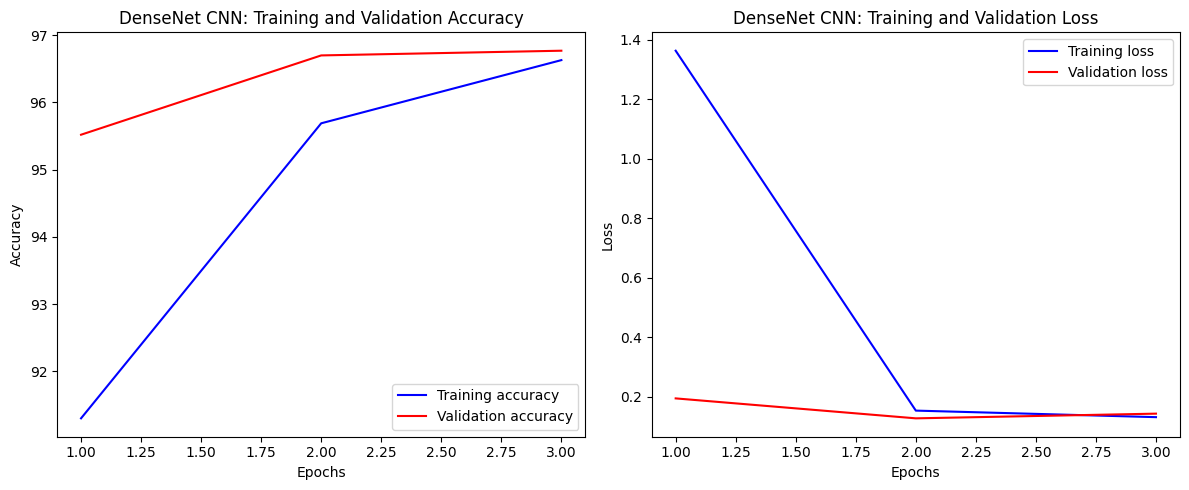

In [ ]:
import matplotlib.pyplot as plt

def plot_epochs_metrics(epochs, accuracy, loss, val_accuracy, val_loss):
    """
    Plot training and validation metrics over epochs.

    Args:
        epochs (list): List of epoch numbers.
        accuracy (list): List of training accuracy values.
        loss (list): List of training loss values.
        val_accuracy (list): List of validation accuracy values.
        val_loss (list): List of validation loss values.
    """
    # Plotting accuracy and loss side by side
    plt.figure(figsize=(12, 5))

    # Plotting accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, accuracy, 'b', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('DenseNet CNN: Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('DenseNet CNN: Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

epochs = range(1, 4)
accuracy = [91.30, 95.69, 96.63]
loss = [1.3633, 0.1526, 0.1306]
val_accuracy = [95.52, 96.70, 96.77]
val_loss = [0.1937, 0.1266, 0.1424]

# Plotting
plot_epochs_metrics(epochs, accuracy, loss, val_accuracy, val_loss)


# Cross-Validation: Accuracy Metrics between the Custom CNN, Inception and DenseNet models

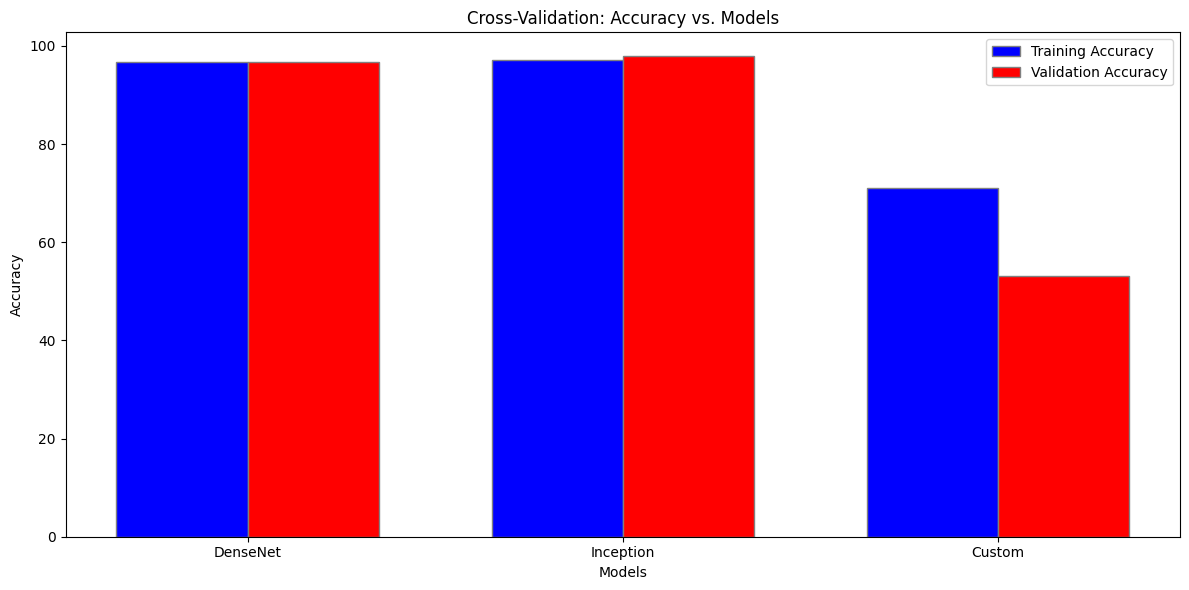

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy(models, accuracy_values, val_accuracy_values):
    """
    Plot accuracy metrics for different models.

    Args:
    - models (list): List of model names.
    - accuracy_values (list): List of training accuracy values for each model.
    - val_accuracy_values (list): List of validation accuracy values for each model.
    """
    # Set the width of the bars
    bar_width = 0.35

    # Set the position of the bars on the x-axis
    r1 = range(len(models))
    r2 = [x + bar_width for x in r1]

    # Plotting accuracy vs. models
    plt.figure(figsize=(12, 6))
    plt.bar(r1, accuracy_values, color='b', width=bar_width, edgecolor='grey', label='Training Accuracy')
    plt.bar(r2, val_accuracy_values, color='r', width=bar_width, edgecolor='grey', label='Validation Accuracy')
    plt.title('Cross-Validation: Accuracy vs. Models')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.xticks([r + bar_width/2 for r in range(len(models))], models)
    plt.legend()


    plt.tight_layout()
    plt.show()

# Define model names
models = ['DenseNet', 'Inception', 'Custom']

# Define accuracy values for each model
accuracy_values = [96.63, 97.14, 71.04]

# Define validation accuracy values for each model
val_accuracy_values = [96.77, 97.87, 53.10]

# Plot accuracy metrics side by side
plot_accuracy(models, accuracy_values, val_accuracy_values)
